### Deep Autoencoder with Keras

In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#mnist

(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


![deep_autoencoder](https://miro.medium.com/max/700/1*EQU7F2dZ6p7_qiA_OS6qQg.png)

In [7]:
#model

#We need to take the input image of dimension 784 and convert it to keras tensors.
input_img= Input(shape=(784,))

#To build the autoencoder we will have to first encode the input image and add 
#different encoded and decoded layer to build the deep autoencoder as shown below.

encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

#For all the hidden layers for the encoder and decoder we use relu activation function for non-linearity.

autoencoder=Model(input_img, decoded)

#We can extract the encoder which takes input image as the input and 
#the output of encoder is the encoded image of dimension 32
encoder = Model(input_img, encoded)

autoencoder.summary()
encoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 784)              

In [8]:
#We compile the autoencoder model with adam optimizer.
#As pixels have a value of 0 0r 1 we use binary_crossentropy as the loss function
#We use accuracy as the metrics used for the performance of the model.

autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#We finally train the autoencoder using the training data with 50 epochs and batch size of 256.
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2466 - accuracy: 0.0097 - val_loss: 0.1670 - val_accuracy: 0.0125
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1502 - accuracy: 0.0114 - val_loss: 0.1353 - val_accuracy: 0.0109
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1303 - accuracy: 0.0112 - val_loss: 0.1228 - val_accuracy: 0.0099
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1202 - accuracy: 0.0114 - val_loss: 0.1155 - val_accuracy: 0.0081
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1144 - accuracy: 0.0098 - val_loss: 0.1107 - val_accuracy: 0.0086
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1102 - accuracy: 0.0106 - val_loss: 0.1068 - val_accuracy: 0.0091
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1068 - accuracy: 0.0110 - val_loss: 0.1043 - val_accuracy: 0.0094

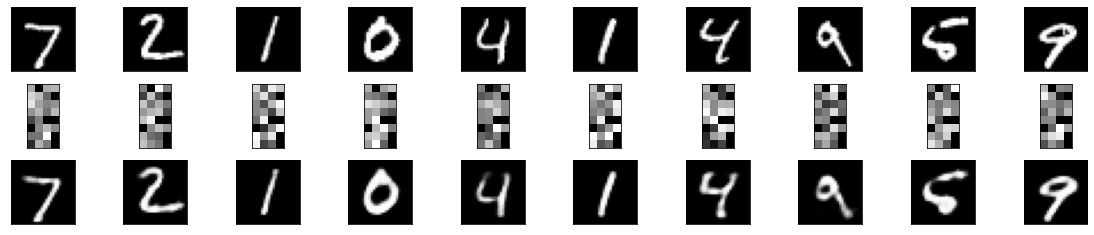

In [5]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()

### DENOISING AUTOENCODERS 

In [4]:
#loading only images and not their labels
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
print(X_train_noisy.shape)
print(X_test_noisy.shape)


(60000, 784)
(10000, 784)


Epoch 1/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6928 - accuracy: 7.6667e-04 - val_loss: 0.6928 - val_accuracy: 0.0010
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6928 - accuracy: 7.6667e-04 - val_loss: 0.6927 - val_accuracy: 0.0010
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6927 - accuracy: 7.6667e-04 - val_loss: 0.6927 - val_accuracy: 0.0010
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6927 - accuracy: 7.5000e-04 - val_loss: 0.6927 - val_accuracy: 0.0010
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6926 - accuracy: 7.5000e-04 - val_loss: 0.6926 - val_accuracy: 0.0011
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6926 - accuracy: 7.3333e-04 - val_loss: 0.6926 - val_accuracy: 0.0011
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6926 - accuracy: 7.3333e-04 - val_

Epoch 55/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6907 - accuracy: 3.3333e-04 - val_loss: 0.6906 - val_accuracy: 6.0000e-04
Epoch 56/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6906 - accuracy: 3.5000e-04 - val_loss: 0.6906 - val_accuracy: 5.0000e-04
Epoch 57/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6906 - accuracy: 3.3333e-04 - val_loss: 0.6905 - val_accuracy: 5.0000e-04
Epoch 58/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6905 - accuracy: 3.3333e-04 - val_loss: 0.6905 - val_accuracy: 5.0000e-04
Epoch 59/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6905 - accuracy: 3.1667e-04 - val_loss: 0.6904 - val_accuracy: 5.0000e-04
Epoch 60/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6904 - accuracy: 2.5000e-04 - val_loss: 0.6904 - val_accuracy: 5.0000e-04
Epoch 61/100
235/235 [==============================] - 3s 12ms/step - loss: 0.690

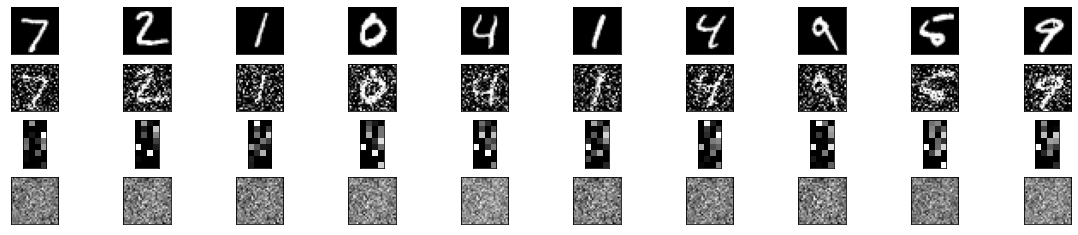

In [5]:
#Input image
input_img= Input(shape=(784,))
# encoded and decoded layer for the autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
# Building autoencoder
autoencoder=Model(input_img, decoded)
#extracting encoder
encoder = Model(input_img, encoded)
# compiling the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the noise trained data to the autoencoder 
autoencoder.fit(X_train_noisy, X_train_noisy,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_noisy))
# reconstructing the image from autoencoder and encoder
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()